# Taryn Michael | 201800323
# Advanced Machine Learning Assignment 5
# Gaussian Process Regression in PYMC3

Let's assume we can model a value as a function of plus some noise:
        $y \sim N(\mu = f(x), \sigma = \epsilon)$

Here $\epsilon \sim N(0, \sigma_{\epsilon})$

This is similar to modelling with Linear Regression. However, here we will put a prior distribution over $f$. Gaussian processes can work with such a prior, thus we can write:

$f(x) \sim GP(\mu_x, K(x, x'))$

Here, $GP$ represents a Gaussian Process distribution, $\mu_x$ the mean function, and $K(x, x')$ the kernel (covariance function)



# Objective
Given  𝑋=[0,0.1,2,4]  &  𝑌=[4,0.9,3.6,5]  , implement a Gaussian Process Regression using PYMC3 to find the function that models the relationship between  𝑋  and  𝑌 .

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import theano.tensor as tt
import theano as T
%matplotlib inline

In [2]:
X = np.array([0,0.1,2,4])
Y = np.array([4,0.9,3.6,5])

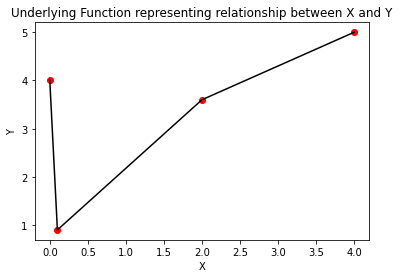

In [3]:
plt.scatter(X, Y, color='red')
plt.plot(X, Y, color='k')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Underlying Function representing relationship between X and Y')
plt.show()

Here, we will use the Squared Exponential Kernel (AKA the Exponential Quadratic Kernel).


It can be computed as:

$𝑘(𝑥_𝑎,𝑥_𝑏)=𝜎^2exp(−‖𝑥_𝑎−𝑥_𝑏‖2ℓ^2) $

With:

- $𝜎^2$  the overall variance (  𝜎  is also known as amplitude).
- $ℓ$  the lengthscale.

In [4]:
# A one dimensional column vector of inputs.
X = X[:, None]
with pm.Model() as GPR:
 # hyperprior for lengthscale kernel parameter
 ℓ = pm.Gamma('ℓ', 2, 0.5)
 # instantiate a covariance function (Kernel)
 cov = pm.gp.cov.ExpQuad(1, ls=ℓ)
 # instantiate a GP prior
 gp = pm.gp.Marginal(cov_func=cov)
 # prior
 ϵ = pm.HalfNormal('ϵ', 25)
 # likelihood
 y_pred = gp.marginal_likelihood('y_pred', X=X, y=Y, noise=ϵ)



In [5]:
with GPR:
  trace_GPR = pm.sample(3000)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [ϵ, ℓ]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 19 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


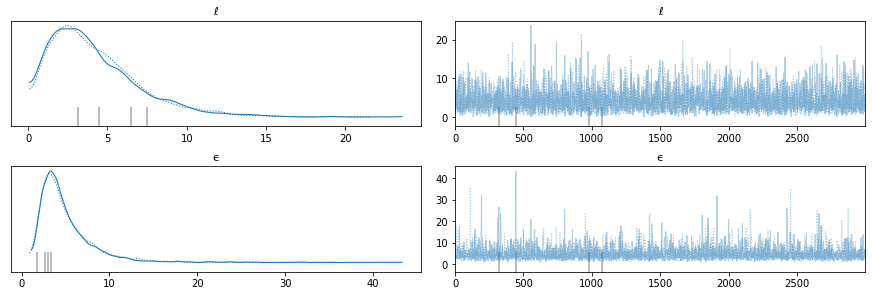

In [7]:
az.plot_trace(trace_GPR);

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3.py:100: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


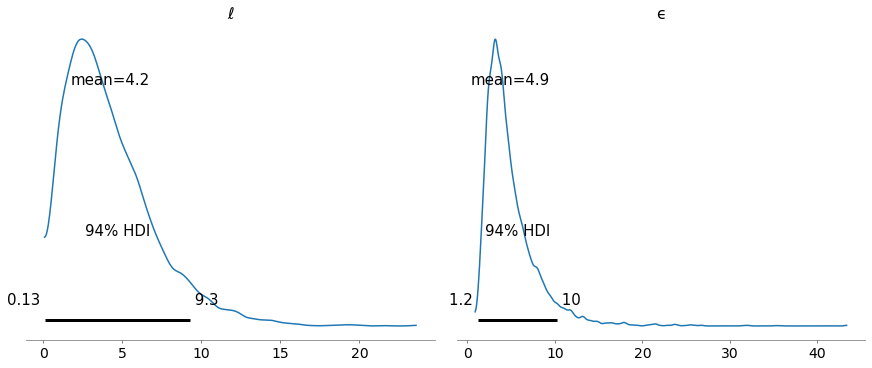

In [8]:
pm.plot_posterior(trace_GPR, figsize=(12, 5));

Plotting joint distribution

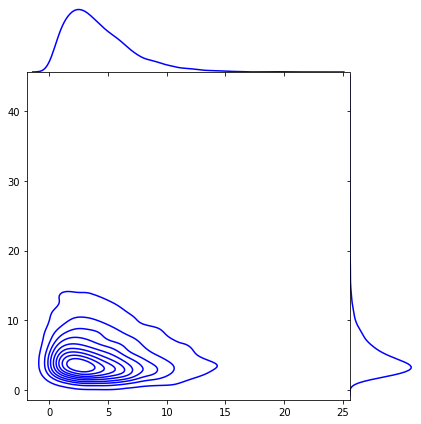

In [11]:
sns.jointplot(x=trace_GPR['ℓ'].T,y=trace_GPR['ϵ'].T, kind='kde', color='blue', space=0);